In [31]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
import nltk
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import LinearSVC
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import cross_val_score

In [5]:
encoding = 'iso-8859-1'

try:
    data = pd.read_csv('IFND.csv', encoding=encoding)
    # Display the first few rows of the DataFrame
    data.head()
except UnicodeDecodeError as e:
    print(f"UnicodeDecodeError: {e}")
data['fake'] = data['Label'].apply( lambda x: 0 if x == "TRUE" else 1)
data.head(10)

,id,Statement,Web,Category,Date,Label,fake
0,2,"WHO praises India's Aarogya Setu app, says it ...",DNAINDIA,COVID-19,Oct-20,TRUE,0
1,3,"In Delhi, Deputy US Secretary of State Stephen...",DNAINDIA,VIOLENCE,Oct-20,TRUE,0
2,4,LAC tensions: China's strategy behind delibera...,DNAINDIA,TERROR,Oct-20,TRUE,0
3,5,India has signed 250 documents on Space cooper...,DNAINDIA,COVID-19,Oct-20,TRUE,0
4,6,Tamil Nadu chief minister's mother passes away...,DNAINDIA,ELECTION,Oct-20,TRUE,0
5,7,Bihar Assembly Election 2020: This is why Tej ...,DNAINDIA,ELECTION,Oct-20,TRUE,0
6,8,"Hathras case: CBI reaches victim's village, vi...",DNAINDIA,VIOLENCE,Oct-20,TRUE,0
7,9,"Rajasthan Crime News: After Karauli, another e...",DNAINDIA,VIOLENCE,Oct-20,TRUE,0
8,10,"Mumbai: BMC to book, penalise people stepping ...",DNAINDIA,VIOLENCE,Oct-20,TRUE,0
9,11,COVID-19: India's single-day spike drops to 55...,DNAINDIA,COVID-19,Oct-20,TRUE,0


In [6]:
data['fake'] = data['Label'].apply( lambda x: 0 if x == "TRUE" else 1)
data.head(10)

,id,Statement,Web,Category,Date,Label,fake
0,2,"WHO praises India's Aarogya Setu app, says it ...",DNAINDIA,COVID-19,Oct-20,TRUE,0
1,3,"In Delhi, Deputy US Secretary of State Stephen...",DNAINDIA,VIOLENCE,Oct-20,TRUE,0
2,4,LAC tensions: China's strategy behind delibera...,DNAINDIA,TERROR,Oct-20,TRUE,0
3,5,India has signed 250 documents on Space cooper...,DNAINDIA,COVID-19,Oct-20,TRUE,0
4,6,Tamil Nadu chief minister's mother passes away...,DNAINDIA,ELECTION,Oct-20,TRUE,0
5,7,Bihar Assembly Election 2020: This is why Tej ...,DNAINDIA,ELECTION,Oct-20,TRUE,0
6,8,"Hathras case: CBI reaches victim's village, vi...",DNAINDIA,VIOLENCE,Oct-20,TRUE,0
7,9,"Rajasthan Crime News: After Karauli, another e...",DNAINDIA,VIOLENCE,Oct-20,TRUE,0
8,10,"Mumbai: BMC to book, penalise people stepping ...",DNAINDIA,VIOLENCE,Oct-20,TRUE,0
9,11,COVID-19: India's single-day spike drops to 55...,DNAINDIA,COVID-19,Oct-20,TRUE,0


In [7]:
data = data.drop("Label", axis=1)

In [8]:
fake_count = (data['fake'] == 1).sum()  # Assuming 'FAKE' represents fake articles
real_count = (data['fake'] == 0).sum()  # Assuming 'REAL' represents real articles

print(f"Number of Fake Articles: {fake_count}")
print(f"Number of Real Articles: {real_count}")

Number of Fake Articles: 18914
Number of Real Articles: 37800


In [9]:
X = data['Statement'] + data['Web'] + data['Category']
y = data['fake']


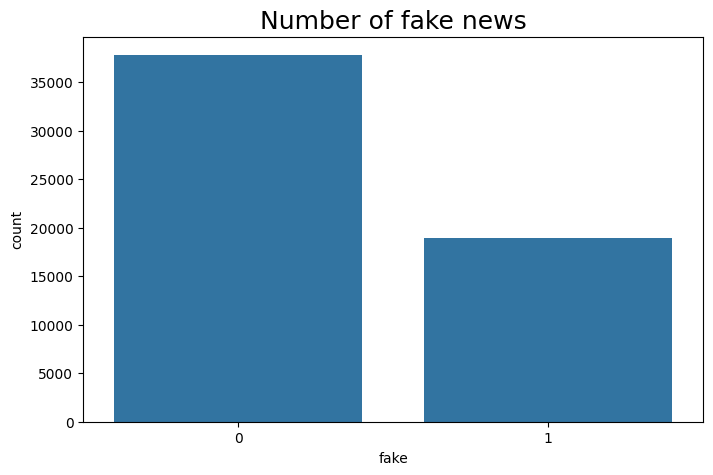

In [10]:
plt.figure(figsize=(8,5))
sns.countplot(x='fake', data=data, order=data.fake.value_counts().index[:,])
plt.title('Number of fake news', size=18);

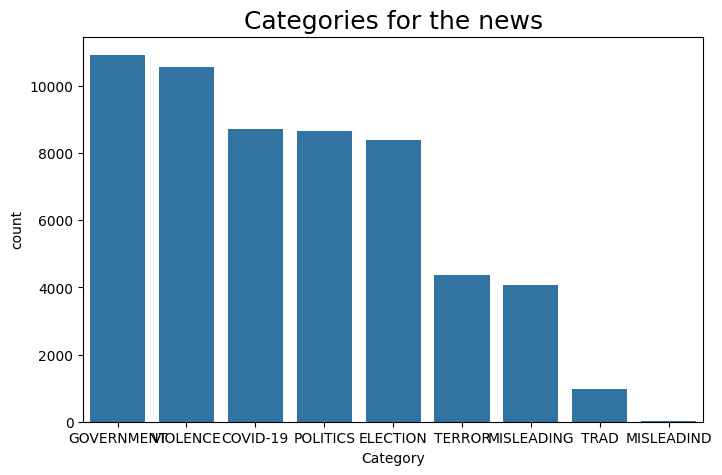

In [11]:
plt.figure(figsize=(8,5))
sns.countplot(x='Category', data=data, order=data.Category.value_counts().index[:,])
plt.title('Categories for the news', size=18);

In [12]:
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2)
vectorizer = TfidfVectorizer(stop_words = "english", max_df = 0.7)
X_train_vectorized = vectorizer.fit_transform(X_train)
X_test_vectorized = vectorizer.transform(X_test)

In [13]:
print("X_train_vectorized shape:", X_train_vectorized.shape)
print("y_train shape:", y_train.shape)

X_train_vectorized shape: (45371, 50833)
y_train shape: (45371,)


In [14]:
clf = LinearSVC(dual=False)
clf.fit(X_train_vectorized, y_train)

LinearSVC(dual=False)

In [15]:
clf.score(X_test_vectorized, y_test)

0.9666754826765406

In [16]:
clf.score(X_train_vectorized, y_train)

0.9964735183266844

In [35]:
scores = cross_val_score(clf,X_test_vectorized, y_test, cv=5, scoring='accuracy')
print(f'Cross-Validation Accuracy: {scores.mean()}')

Cross-Validation Accuracy: 0.948425445950053


In [37]:
prediction = clf.predict(X_test_vectorized)

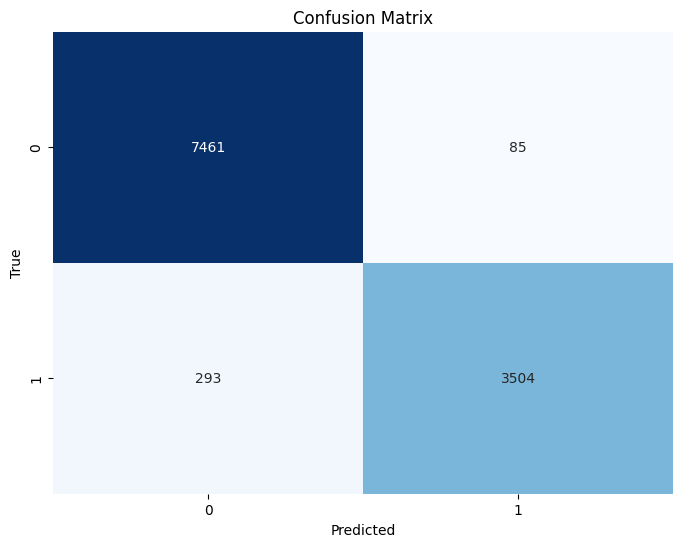

In [38]:
cm = confusion_matrix(y_test, prediction)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()


In [17]:
X_test.iloc[10]

'Military moves raise fears of escalation along LACINDIANEXPRESSTERROR'

In [18]:
with open("my_Text.txt", "w", encoding = "utf-8") as f:
        f.write(X_test.iloc[10])

In [19]:
with open("my_Text.txt", "r", encoding = "utf-8") as f:
        text = f.read()

In [20]:
vectorized_text = vectorizer.transform([text])

In [21]:
prediction = clf.predict(vectorized_text)
if prediction == 0:
    print("The new article is predicted as real.")
else:
    print("The new article is predicted as fake.")

The new article is predicted as real.


In [22]:

y_test_new = y_test.to_numpy()


In [23]:
f = open('hmmm.txt','r',errors='ignore')
raw_doc = f.read()
raw_doc =raw_doc.lower()
nltk.download('punkt')
nltk.download('wordnet')
sent_tokens = nltk.sent_tokenize(raw_doc)
word_tokens = nltk.word_tokenize(raw_doc)

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\lenovo\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\lenovo\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [24]:
lemmer = nltk.stem.WordNetLemmatizer()
def LemTokens(tokens):
    return [lemmer.lemmatize(token) for token in tokens]
remove_punc_dict = dict((ord(punct),None) for punct in string.punctuation)
def LemNormalize(text):
    return LemTokens(nltk.word_tokenize(text.lower().translate(remove_punc_dict)))


In [25]:
greet_inputs = ("hello","hi","bonjour","greetings","sup","what's up","hey")
greet_outputs = ["hi","hey","hi,how you doin?","hello","I am glad! You are talking to me"]
def greet(sentence):
    for word in sentence.split():
        if word.lower() in greet_inputs:
            return random.choice(greet_outputs)

In [26]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

In [27]:
def response(user_response):
    robo1_resp=''
    TfidfVec = TfidfVectorizer(tokenizer=LemNormalize,stop_words = 'english')
    tfidf = TfidfVec.fit_transform(sent_tokens)
    vals = cosine_similarity(tfidf[-1],tfidf)
    idx = vals.argsort()[0][-2]
    flat = vals.flatten()
    flat.sort()
    req_tfidf = flat[-2]
    if(req_tfidf==0):
        robo1_resp = robo1_resp + "I am sorry! I don't understand you"
        return robo1_resp
    else:
        robo1_resp = robo1_resp + sent_tokens[idx]
        return robo1_resp

ChatBot integrated with the LinearSVC

In [29]:
flag = True
print("Bot : My name is Shreya. Let's have a conversation! Also, if you want to exit any time, just type Bye!")
while(flag == True):
    user_resp = input()
    user_resp = user_resp.lower()
    if(user_resp!='bye'):
         if(user_resp=='thanks' or user_resp == 'thank you'):
             print("BOt : You are Welcome..")
         else:
             if(greet(user_resp)!=None):
                 print("BOT: "+greet(user_resp))
             else:
                 with open("my_Text.txt", "w", encoding = "utf-8") as f:
                       f.write(user_resp)
                 with open("my_Text.txt", "r", encoding = "utf-8") as f:
                     text = f.read()
                 vectorized_text = vectorizer.transform([text])
                 prediction = clf.predict(vectorized_text)
                 sent_tokens.append(user_resp)
                 word_tokens=word_tokens+nltk.word_tokenize(user_resp)
                 final_words = list(set(word_tokens))
                 print("BOT: ",end="")
                 if prediction == 0:
                     print("The new article is predicted as real.")
                 else:
                     print("The new article is predicted as fake.")
                 print("Other related news:")
                 print(response(user_resp))
                 sent_tokens.remove(user_resp)
    else:
        flag=False
        print("BOT: Goodbye! Take care <3")

Bot : My name is Shreya. Let's have a conversation! Also, if you want to exit any time, just type Bye!
BOT: I am glad! You are talking to me
BOT: The new article is predicted as real.
Other related news:


c:\Python312\Lib\site-packages\sklearn\feature_extraction\text.py:525: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(
c:\Python312\Lib\site-packages\sklearn\feature_extraction\text.py:408: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['ha', 'le', 'u', 'wa'] not in stop_words.
  warnings.warn(


fact check: old anti-caa protest in kolkata goes viral as bihar?s opposition to pm modi .
BOT: Goodbye! Take care <3
